In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
# Dynamic width of the notebook itself.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Read the data

In [4]:
df = pd.read_csv("all_results.csv")
df.head()

,mode,#cnots_per_layer,#phase_layers,CX depth_mean,# CX_mean,Rz depth_mean,# Rz_mean,CX depth_median,# CX_median,Rz depth_median,...,# CX_min,Rz depth_min,# Rz_min,time_min,CX depth_max,# CX_max,Rz depth_max,# Rz_max,time_max,notes
0,tket,10,10,133.50,207.10,28.35,90.0,133.5,208.0,28.5,...,181,23,90,0 days 00:00:00.059404000,154,232,33,90,0 days 00:00:00.084805000,"No ordering, iterative tket placement"
1,tket,30,3,122.80,185.45,9.55,27.0,122.0,186.0,9.0,...,161,7,27,0 days 00:00:00.038304000,144,216,14,27,0 days 00:00:00.049043000,"No ordering, iterative tket placement"
2,tket,1,10,12.05,18.55,16.65,90.0,12.0,19.0,16.0,...,11,13,90,0 days 00:00:00.024446000,17,25,25,90,0 days 00:00:00.026746000,"No ordering, iterative tket placement"
3,tket,10,3,39.05,61.80,7.60,27.0,38.5,61.5,7.0,...,46,5,27,0 days 00:00:00.016320000,52,82,11,27,0 days 00:00:00.021987000,"No ordering, iterative tket placement"
4,tket,30,10,407.65,622.40,31.65,90.0,403.5,618.5,31.5,...,593,24,90,0 days 00:00:00.134597000,446,659,39,90,0 days 00:00:00.157520000,"No ordering, iterative tket placement"


In [5]:
df.time_min = pd.to_timedelta(df.time_min).apply(lambda x: x.total_seconds())
df.time_max = pd.to_timedelta(df.time_max).apply(lambda x: x.total_seconds())
df.dtypes

mode                 object
#cnots_per_layer      int64
#phase_layers         int64
CX depth_mean       float64
# CX_mean           float64
Rz depth_mean       float64
# Rz_mean           float64
CX depth_median     float64
# CX_median         float64
Rz depth_median     float64
# Rz_median         float64
CX depth_min          int64
# CX_min              int64
Rz depth_min          int64
# Rz_min              int64
time_min            float64
CX depth_max          int64
# CX_max              int64
Rz depth_max          int64
# Rz_max              int64
time_max            float64
notes                object
dtype: object

# Filter the data

In [6]:
df = df[(df["mode"] == "tket") | df["notes"].isin([
                                              "Partition (not parity) ordering, only initial tket placement, parity permutation", # Good in almost every situation
                                              #"Partition (not parity) ordering, only initial tket placement", # Much worse than the other options
                                              "Partition and parity ordering, only initial tket placement", # Slightly better than iterative placement
                                              #"Partition (not parity) ordering, iterative tket placement", # Much worse than the other options
                                              #"Partition (not parity) ordering, iterative tket placement, parity permutation", # Good for single layer, but worse in multilayer
                                              #"Partition and parity ordering, iterative tket placement", # Slightly worse than only initial placement
                                              #"Partition and parity ordering, iterative tket placement, parity permutation" # Good for single layer, but horrible in multilayer
                                                "Partition (not parity) ordering, iterative initial tket placement2, parity permutation", # Does not improve - optimizing gauss does not optimize steiner-gauss it seems.
                                                "tket->steiner3", # tket->steiner/tket->steiner2 has wrong implementation
                                                "phase_poly->tket",
                                                ""
                                                  ])]

# Visualize the data

In [7]:
# Parameters
phase_layers = [1,2,3,5,10]
label = "CX depth_mean"
figure_size = (20,60)

<IPython.core.display.Javascript object>


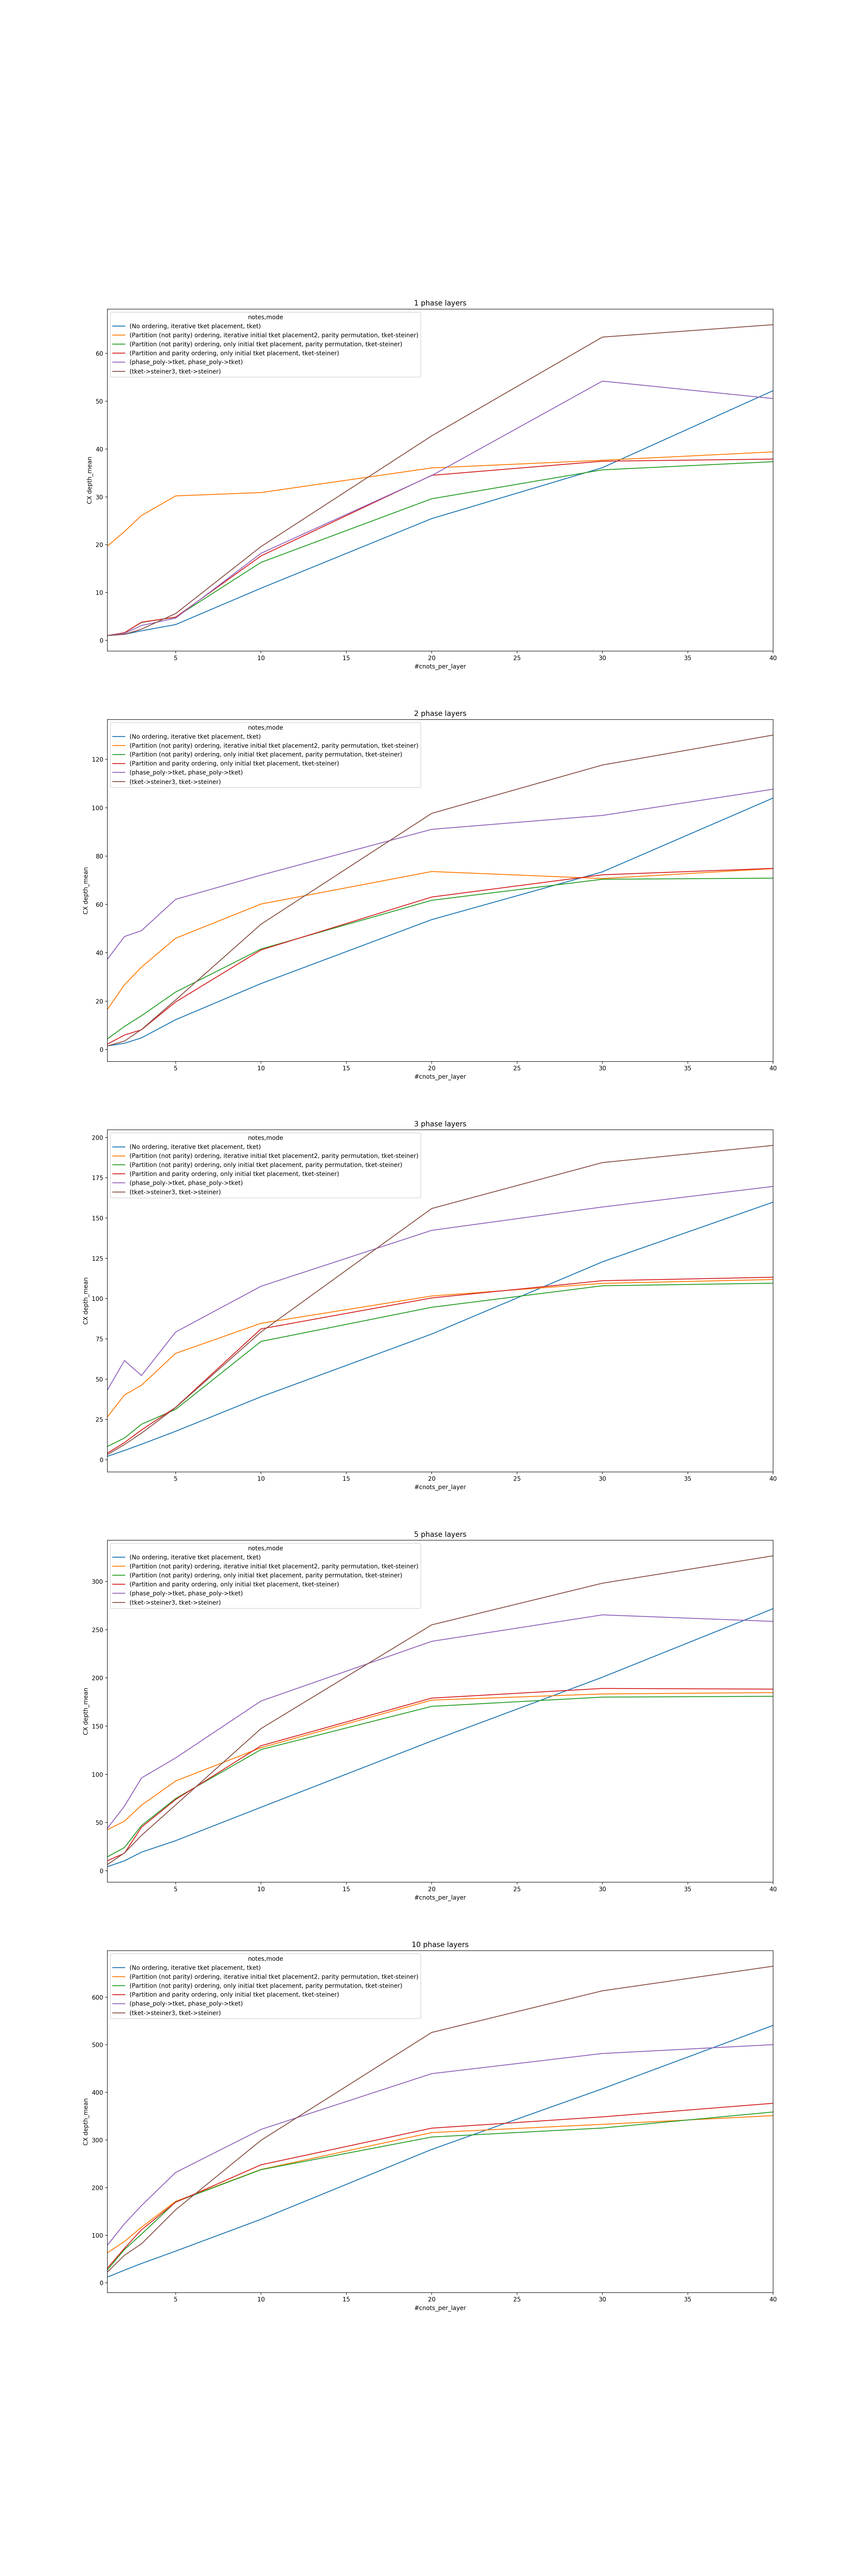

/Users/ariannemeijer/miniconda3/envs/steinerenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
fig, ax = plt.subplots(len(phase_layers), 1, figsize=figure_size)
for i, phase in enumerate(phase_layers):
    df[df["mode"] != "steiner"][df["#phase_layers"]==phase].groupby(["#cnots_per_layer", "mode", "notes"]).max()[label].unstack().unstack().dropna(1).plot(ax=ax[i])
    ax[i].title.set_text(str(phase)+' phase layers')
    ax[i].set_ylabel(label)
fig.show()

# Replicate Nash et al. figures

In [15]:
def plot_varying_circuit_size(file):
    df = pd.read_csv(file)
    df1 = df[df["mode"]=="steiner"]
    df2 = df[df["mode"]=="phase_poly->tket"]
    df3 = df[df["mode"]=="gauss"]
    df1.set_index("file", inplace=True)
    df2.set_index("file", inplace=True)
    df3.set_index("file", inplace=True)
    overhead = (df2["# CX"] - df1["# CX"])/df2["# CX"]*100
    plt.clf()
    plt.scatter(df3["# CX"], overhead)

In [16]:
plt.xlabel("# CNOTs before routing")
plt.ylabel("% CNOT overhead compared to phasepoly->tket")
plot_varying_circuit_size("results_acorn.csv")

<IPython.core.display.Javascript object>


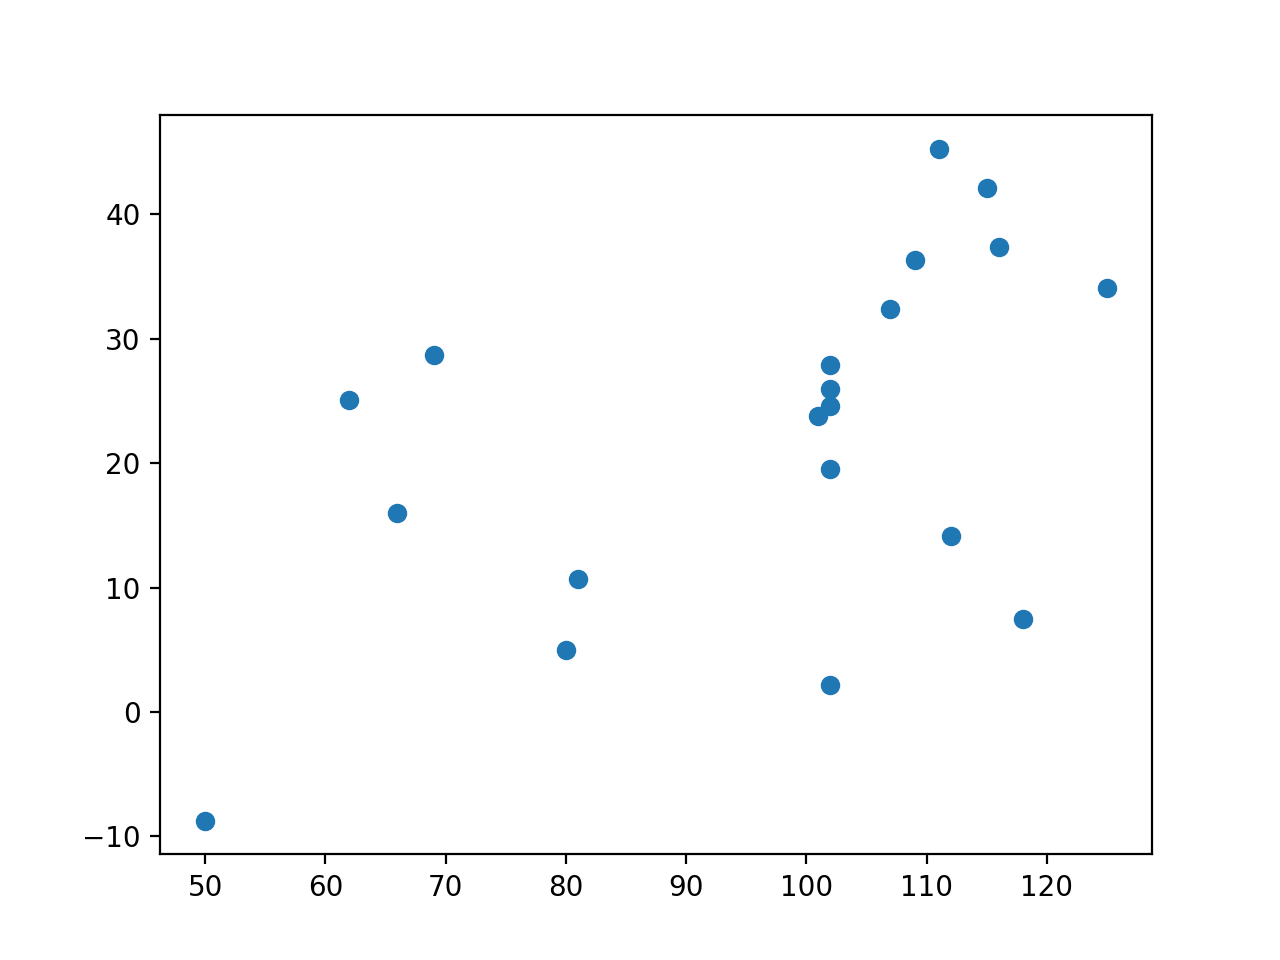

In [6]:
plt.xlabel("# CNOTs before routing")
plt.ylabel("% CNOT overhead compared to phasepoly->tket")
plot_varying_circuit_size("results_tokyo3.csv")

# Misc and scratch pad

In [9]:
df[df["mode"] != "steiner"][df["#phase_layers"]==phase].groupby(["#cnots_per_layer", "mode", "notes"]).max()[label].unstack().unstack().dropna(1)

/Users/ariannemeijer/miniconda3/envs/steinerenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


notes,"No ordering, iterative tket placement","Partition (not parity) ordering, iterative initial tket placement2, parity permutation","Partition (not parity) ordering, only initial tket placement, parity permutation","Partition and parity ordering, only initial tket placement",phase_poly->tket,tket->steiner3
mode,tket,tket-steiner,tket-steiner,tket-steiner,phase_poly->tket,tket->steiner
#cnots_per_layer,,,,,,
1,12.05,63.05,27.15,30.80,79.00,22.70
2,26.60,86.75,69.95,72.55,124.00,57.75
3,40.60,116.90,102.25,111.55,162.30,82.05
5,66.65,171.20,169.95,169.20,231.90,153.40
10,133.50,238.15,237.65,247.90,322.25,299.40
20,280.20,315.60,306.30,324.90,439.40,525.95
30,407.65,332.95,325.15,348.60,481.75,613.40
40,540.80,351.20,358.90,377.15,500.30,665.10


In [10]:
df.tail()["notes"].tolist()

['tket->steiner3',
 'tket->steiner3',
 'tket->steiner3',
 'tket->steiner3',
 'tket->steiner3']